In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
PATH = "data/project/"
# had to rename the "model" folder to "models"
sz=224
arch = resnet34

In [7]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name="test")


In [8]:
# save test set for use with caffe2 
(img, label) = next(iter(data.test_dl))
test_img_numpy = img.cpu().numpy()
test_labels_numpy = label.cpu().numpy()
np.save("test_img_numpy", test_img_numpy)
np.save("test_label_numpy", test_labels_numpy)

data.test_ds.fnames

['test/160306600.jpg',
 'test/210761939.jpg',
 'test/5.jpg',
 'test/173701358.jpg',
 'test/197303393.jpg',
 'test/2.jpg',
 'test/1.jpg',
 'test/210836813.jpg',
 'test/4.jpg',
 'test/187172553.jpg',
 'test/7.jpg',
 'test/3.jpg',
 'test/195556035.jpg',
 'test/166493158.jpg',
 'test/186159803.jpg',
 'test/160173742.jpg',
 'test/185543547.jpg',
 'test/164932508.jpg',
 'test/181160404.jpg',
 'test/6.jpg',
 'test/183813036.jpg',
 'test/195562508.jpg']

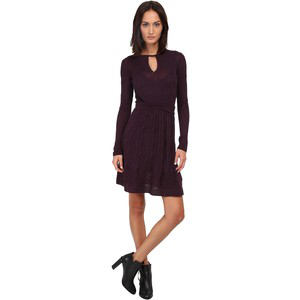

In [9]:
PIL.Image.open(PATH + "test/160306600.jpg")

### Part 1 - Load the model with fastai and check the predictions

In [10]:
import fastai

In [11]:
fastai.conv_learner.caffe2_batch_norm_compat = False

In [12]:
learn = ConvLearner.pretrained(arch, data)

In [13]:
learn.load("sleeves_v1")

this is the original model

In [14]:
learn

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [15]:
log_preds = learn.predict(True)

In [16]:
probs = np.exp(log_preds); probs

array([[0.00087, 0.00029, 0.15039, 0.84845],
       [0.99802, 0.00076, 0.00002, 0.00121],
       [0.99906, 0.00025, 0.00001, 0.00068],
       [0.02508, 0.87104, 0.08766, 0.01622],
       [0.97537, 0.02162, 0.00037, 0.00264],
       [0.99859, 0.00053, 0.00003, 0.00085],
       [0.01338, 0.9761 , 0.00588, 0.00464],
       [0.99846, 0.0003 , 0.00002, 0.00122],
       [0.9948 , 0.00282, 0.00027, 0.0021 ],
       [0.00235, 0.00667, 0.87351, 0.11747],
       [0.02373, 0.97369, 0.00109, 0.00149],
       [0.99892, 0.00026, 0.00002, 0.0008 ],
       [0.0137 , 0.00432, 0.15233, 0.82965],
       [0.96586, 0.02985, 0.00236, 0.00194],
       [0.01003, 0.01191, 0.2424 , 0.73566],
       [0.08843, 0.66529, 0.08015, 0.16613],
       [0.07464, 0.92336, 0.00042, 0.00158],
       [0.00008, 0.00008, 0.02065, 0.97919],
       [0.05247, 0.86872, 0.06157, 0.01723],
       [0.00001, 0.00002, 0.00634, 0.99362],
       [0.00008, 0.00004, 0.03924, 0.96064],
       [0.00308, 0.002  , 0.26308, 0.73184]], dtype=flo

the predictions seem alright. now let's extract the pytorch model

In [17]:
model = learn.models.model
model = model.cpu()
model = model.eval()

In [18]:
model_input = Variable(img).cpu()

In [19]:
test_log_preds = model(model_input).data.cpu().numpy()

In [20]:
test_probs = np.exp(test_log_preds)

In [21]:
test_probs

array([[0.00087, 0.00029, 0.15039, 0.84845],
       [0.99802, 0.00076, 0.00002, 0.00121],
       [0.99906, 0.00025, 0.00001, 0.00068],
       [0.02508, 0.87104, 0.08766, 0.01622],
       [0.97537, 0.02162, 0.00037, 0.00264],
       [0.99859, 0.00053, 0.00003, 0.00085],
       [0.01338, 0.9761 , 0.00588, 0.00464],
       [0.99846, 0.0003 , 0.00002, 0.00122],
       [0.9948 , 0.00282, 0.00027, 0.0021 ],
       [0.00235, 0.00667, 0.87351, 0.11747],
       [0.02373, 0.97369, 0.00109, 0.00149],
       [0.99892, 0.00026, 0.00002, 0.0008 ],
       [0.0137 , 0.00432, 0.15233, 0.82965],
       [0.96586, 0.02985, 0.00236, 0.00194],
       [0.01003, 0.01191, 0.2424 , 0.73566],
       [0.08843, 0.66529, 0.08015, 0.16613],
       [0.07464, 0.92336, 0.00042, 0.00158],
       [0.00008, 0.00008, 0.02065, 0.97919],
       [0.05247, 0.86872, 0.06157, 0.01723],
       [0.00001, 0.00002, 0.00634, 0.99362],
       [0.00008, 0.00004, 0.03924, 0.96064],
       [0.00308, 0.002  , 0.26308, 0.73184]], dtype=flo

In [22]:
np.allclose(test_probs, probs)

True

amazing, so the pytorch model produces the same output

if we try to export the model now to ONNX, it will export correctly, but will fail to run in caffe2 lateron (batchnorm shape issue)

In [23]:
# from torch documentation
from torch.autograd import Variable
import torch.onnx
import torchvision

dummy_input = Variable(torch.randn(1, 3, 224, 224)).cpu()


torch.onnx.export(model, dummy_input, "sleeves_no_batchnorm_fix.proto", verbose=True)

graph(%1 : Float(1, 3, 224, 224)
      %2 : Float(64, 3, 7, 7)
      %3 : Float(64)
      %4 : Float(64)
      %5 : Float(64)
      %6 : Float(64)
      %7 : Float(64, 64, 3, 3)
      %8 : Float(64)
      %9 : Float(64)
      %10 : Float(64)
      %11 : Float(64)
      %12 : Float(64, 64, 3, 3)
      %13 : Float(64)
      %14 : Float(64)
      %15 : Float(64)
      %16 : Float(64)
      %17 : Float(64, 64, 3, 3)
      %18 : Float(64)
      %19 : Float(64)
      %20 : Float(64)
      %21 : Float(64)
      %22 : Float(64, 64, 3, 3)
      %23 : Float(64)
      %24 : Float(64)
      %25 : Float(64)
      %26 : Float(64)
      %27 : Float(64, 64, 3, 3)
      %28 : Float(64)
      %29 : Float(64)
      %30 : Float(64)
      %31 : Float(64)
      %32 : Float(64, 64, 3, 3)
      %33 : Float(64)
      %34 : Float(64)
      %35 : Float(64)
      %36 : Float(64)
      %37 : Float(128, 64, 3, 3)
      %38 : Float(128)
      %39 : Float(128)
      %40 : Float(128)
      %41 : Float(128)
      %42 :

### Part 2 - activate batchnorm compatibility


In [24]:
fastai.conv_learner.caffe2_batch_norm_compat = True

In [25]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name="test")
learn = ConvLearner.pretrained(arch, data)

notice the new "BatchNormExpand" and "BatchNormContract" layers

In [26]:
learn

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

if we  to load the weights now, it will fail, as the new layers change the structure of the network

In [27]:
learn.load("sleeves_v1")

KeyError: 'unexpected key "10.weight" in state_dict'

lets extract the model, fix the naming issues and load the weights. If you train the model with this fork of fastai, you dont need to do this (actually it would break the model)

In [28]:
model = learn.models.model
model = model.cpu()
model = model.eval()

In [29]:
state_dict = torch.load(PATH + "models/sleeves_v1.h5", map_location=lambda storage, loc: storage)

In [35]:
state_dict.keys()

odict_keys(['0.weight', '1.weight', '1.bias', '1.running_mean', '1.running_var', '4.0.conv1.weight', '4.0.bn1.weight', '4.0.bn1.bias', '4.0.bn1.running_mean', '4.0.bn1.running_var', '4.0.conv2.weight', '4.0.bn2.weight', '4.0.bn2.bias', '4.0.bn2.running_mean', '4.0.bn2.running_var', '4.1.conv1.weight', '4.1.bn1.weight', '4.1.bn1.bias', '4.1.bn1.running_mean', '4.1.bn1.running_var', '4.1.conv2.weight', '4.1.bn2.weight', '4.1.bn2.bias', '4.1.bn2.running_mean', '4.1.bn2.running_var', '4.2.conv1.weight', '4.2.bn1.weight', '4.2.bn1.bias', '4.2.bn1.running_mean', '4.2.bn1.running_var', '4.2.conv2.weight', '4.2.bn2.weight', '4.2.bn2.bias', '4.2.bn2.running_mean', '4.2.bn2.running_var', '5.0.conv1.weight', '5.0.bn1.weight', '5.0.bn1.bias', '5.0.bn1.running_mean', '5.0.bn1.running_var', '5.0.conv2.weight', '5.0.bn2.weight', '5.0.bn2.bias', '5.0.bn2.running_mean', '5.0.bn2.running_var', '5.0.downsample.0.weight', '5.0.downsample.1.weight', '5.0.downsample.1.bias', '5.0.downsample.1.running_mean',

In [30]:
keymap = {
    "10":"11",
    "11":"13",
    "12":"14",
    "14":"17",
    "15":"19",
    "16":"20"
}

In [31]:
def map_key(old_key):
    prefix = old_key[:2]
    suffix = old_key[2:]
    return keymap[prefix] + suffix

In [32]:
new_state_dict = OrderedDict((map_key(old_key) if old_key[:2] in keymap.keys() else old_key, v) for old_key, v in state_dict.items())

In [36]:
# we see that the keys have been renamed
new_state_dict.keys()

odict_keys(['0.weight', '1.weight', '1.bias', '1.running_mean', '1.running_var', '4.0.conv1.weight', '4.0.bn1.weight', '4.0.bn1.bias', '4.0.bn1.running_mean', '4.0.bn1.running_var', '4.0.conv2.weight', '4.0.bn2.weight', '4.0.bn2.bias', '4.0.bn2.running_mean', '4.0.bn2.running_var', '4.1.conv1.weight', '4.1.bn1.weight', '4.1.bn1.bias', '4.1.bn1.running_mean', '4.1.bn1.running_var', '4.1.conv2.weight', '4.1.bn2.weight', '4.1.bn2.bias', '4.1.bn2.running_mean', '4.1.bn2.running_var', '4.2.conv1.weight', '4.2.bn1.weight', '4.2.bn1.bias', '4.2.bn1.running_mean', '4.2.bn1.running_var', '4.2.conv2.weight', '4.2.bn2.weight', '4.2.bn2.bias', '4.2.bn2.running_mean', '4.2.bn2.running_var', '5.0.conv1.weight', '5.0.bn1.weight', '5.0.bn1.bias', '5.0.bn1.running_mean', '5.0.bn1.running_var', '5.0.conv2.weight', '5.0.bn2.weight', '5.0.bn2.bias', '5.0.bn2.running_mean', '5.0.bn2.running_var', '5.0.downsample.0.weight', '5.0.downsample.1.weight', '5.0.downsample.1.bias', '5.0.downsample.1.running_mean',

In [37]:
model.load_state_dict(new_state_dict)

In [38]:
model = model.cpu()
model = model.eval()

great the weights load now correctly. lets check the predictions again

In [39]:
(img, label) = next(iter(data.test_dl))

model_input = Variable(img).cpu()
test_log_preds = model(model_input).data.cpu().numpy()
test_probs = np.exp(test_log_preds);test_probs

array([[0.00087, 0.00029, 0.15039, 0.84845],
       [0.99802, 0.00076, 0.00002, 0.00121],
       [0.99906, 0.00025, 0.00001, 0.00068],
       [0.02508, 0.87104, 0.08766, 0.01622],
       [0.97537, 0.02162, 0.00037, 0.00264],
       [0.99859, 0.00053, 0.00003, 0.00085],
       [0.01338, 0.9761 , 0.00588, 0.00464],
       [0.99846, 0.0003 , 0.00002, 0.00122],
       [0.9948 , 0.00282, 0.00027, 0.0021 ],
       [0.00235, 0.00667, 0.87351, 0.11747],
       [0.02373, 0.97369, 0.00109, 0.00149],
       [0.99892, 0.00026, 0.00002, 0.0008 ],
       [0.0137 , 0.00432, 0.15233, 0.82965],
       [0.96586, 0.02985, 0.00236, 0.00194],
       [0.01003, 0.01191, 0.2424 , 0.73566],
       [0.08843, 0.66529, 0.08015, 0.16613],
       [0.07464, 0.92336, 0.00042, 0.00158],
       [0.00008, 0.00008, 0.02065, 0.97919],
       [0.05247, 0.86872, 0.06157, 0.01723],
       [0.00001, 0.00002, 0.00634, 0.99362],
       [0.00008, 0.00004, 0.03924, 0.96064],
       [0.00308, 0.002  , 0.26308, 0.73184]], dtype=flo

exactly the same as before

In [40]:
# this is just a precaution, if somewhere in the code torch.Tensor is called, it will be a cpu tensor 
torch.set_default_tensor_type("torch.FloatTensor")

finally we can export the model

In [41]:
from torch.autograd import Variable
import torch.onnx
import torchvision

# the first dimension of the dummy_variable is the batch_size that will be used in the exported model
dummy_input = Variable(torch.randn(1, 3, 224, 224)).cpu()


torch.onnx.export(model, dummy_input, "sleeves_fixed_batchnorm.proto", verbose=True)

graph(%1 : Float(1, 3, 224, 224)
      %2 : Float(64, 3, 7, 7)
      %3 : Float(64)
      %4 : Float(64)
      %5 : Float(64)
      %6 : Float(64)
      %7 : Float(64, 64, 3, 3)
      %8 : Float(64)
      %9 : Float(64)
      %10 : Float(64)
      %11 : Float(64)
      %12 : Float(64, 64, 3, 3)
      %13 : Float(64)
      %14 : Float(64)
      %15 : Float(64)
      %16 : Float(64)
      %17 : Float(64, 64, 3, 3)
      %18 : Float(64)
      %19 : Float(64)
      %20 : Float(64)
      %21 : Float(64)
      %22 : Float(64, 64, 3, 3)
      %23 : Float(64)
      %24 : Float(64)
      %25 : Float(64)
      %26 : Float(64)
      %27 : Float(64, 64, 3, 3)
      %28 : Float(64)
      %29 : Float(64)
      %30 : Float(64)
      %31 : Float(64)
      %32 : Float(64, 64, 3, 3)
      %33 : Float(64)
      %34 : Float(64)
      %35 : Float(64)
      %36 : Float(64)
      %37 : Float(128, 64, 3, 3)
      %38 : Float(128)
      %39 : Float(128)
      %40 : Float(128)
      %41 : Float(128)
      %42 :